In [3196]:
import os
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3197]:
# warning: this is not the actual code just an interactive code notebook to understand the code and data interactively.
# this file is good to know how code is working but does not cover all cases.
# please use pycharm to run the code from main.py file

Data2019 = "/content/drive/MyDrive/Colab_Notebooks/Data2019"
GridEyeData = "/content/drive/MyDrive/Colab_Notebooks/GridEyeData"
print(Data2019)
print(GridEyeData)

/content/drive/MyDrive/Colab_Notebooks/Data2019
/content/drive/MyDrive/Colab_Notebooks/GridEyeData


In [3198]:
# numpy arrays are loaded from files without first 2 lines of header
# First column(0) of thermistor reading is removed from array on axis = 1
control_nothing = np.delete(np.genfromtxt(os.path.join(Data2019, "control" , "nothing") , skip_header = 2), 0, 1)
indoors_none_blank =np.delete(np.genfromtxt(os.path.join(GridEyeData, "indoors" , "none" , "blank.txt") , skip_header = 2), 0, 1)
indoors_single_1foot =np.delete(np.genfromtxt(os.path.join(GridEyeData, "indoors" , "single" , "1foot.txt") , skip_header = 2), 0, 1)
indoors_single_3feet =np.delete(np.genfromtxt(os.path.join(GridEyeData, "indoors" , "single" , "3feet.txt") , skip_header = 2), 0, 1)
indoors_single_8feet =np.delete(np.genfromtxt(os.path.join(GridEyeData, "indoors" , "single" , "8feet.txt") , skip_header = 2), 0, 1)
indoors_two_3foot =np.delete(np.genfromtxt(os.path.join(GridEyeData, "indoors" , "two" , "3foot.txt") , skip_header = 2), 0, 1)
indoors_three_3feet =np.delete(np.genfromtxt(os.path.join(GridEyeData, "indoors" , "three" , "3feet.txt") , skip_header = 2), 0, 1)
distance_1p1ft =np.delete(np.genfromtxt(os.path.join(Data2019, "distance" , "1p1ft") , skip_header = 2), 0, 1)
control_1p3ft =np.delete(np.genfromtxt(os.path.join(Data2019, "control" , "1p3ft") , skip_header = 2), 0, 1)
distance_1p6ft =np.delete(np.genfromtxt(os.path.join(Data2019, "distance" , "1p6ft") , skip_header = 2), 0, 1)
qty_2p3ft = np.delete(np.genfromtxt(os.path.join(Data2019, "qty" , "2p3ft") , skip_header = 2), 0, 1)
qty_3p3ft = np.delete(np.genfromtxt(os.path.join(Data2019, "qty" , "3p3ft") , skip_header = 2), 0, 1)
outdoors_nothingo =np.delete(np.genfromtxt(os.path.join(Data2019, "outdoors" , "nothingo") , skip_header = 2), 0, 1)
outdoors_none_blank =np.delete(np.genfromtxt(os.path.join(GridEyeData, "outdoors" , "none" , "blank.txt") , skip_header = 2), 0, 1)
outdoors_1p1fto =np.delete(np.genfromtxt(os.path.join(Data2019, "outdoors" , "1p1fto") , skip_header = 2), 0, 1)
outdoors_single_1foot =np.delete(np.genfromtxt(os.path.join(GridEyeData, "outdoors" , "single" , "1foot.txt") , skip_header = 2), 0, 1)
outdoors_1p3fto =np.delete(np.genfromtxt(os.path.join(Data2019, "outdoors" , "1p3fto") , skip_header = 2), 0, 1)
outdoors_single_6feet =np.delete(np.genfromtxt(os.path.join(GridEyeData, "outdoors" , "single" , "6feet.txt") , skip_header = 2), 0, 1)

In [3199]:
print(control_nothing)  # values of all files are in this numpy array format
print(control_nothing.shape)

[[96. 88. 90. ... 71. 70. 64.]
 [90. 88. 89. ... 69. 72. 62.]
 [92. 83. 91. ... 71. 69. 65.]
 ...
 [89. 89. 88. ... 73. 73. 64.]
 [93. 92. 85. ... 72. 73. 68.]
 [92. 88. 86. ... 74. 70. 63.]]
(158, 64)


In [3200]:
# creating labels for each file according to the information provided in the file and storing into a ndarray
# labels are as:
#     "Location": ["Outdoor": 0, "Indoor": 1],
#     "Subject Quantity": ["None": 0, "Single":1, "Two": 2, "Three": 3],
#     "Presence": ["Absence": 0, "Presence": 1],
#     "Distance": ["Dist 1'": 0, "Dist 3'": 1, "Dist 6/8'": 2]

label_control_nothing = np.tile([1,0,0,np.nan], (control_nothing.shape[0],1))
label_indoors_none_blank = np.tile([1,0,0,np.nan], (indoors_none_blank.shape[0],1))
label_indoors_single_1foot = np.tile([1,1,1,0], (indoors_single_1foot.shape[0],1))
label_indoors_single_3feet = np.tile([1,1,1,1], (indoors_single_3feet.shape[0],1))
label_indoors_single_8feet = np.tile([1,1,1,2], (indoors_single_8feet.shape[0],1))
label_indoors_two_3foot = np.tile([1,2,1,1], (indoors_two_3foot.shape[0],1))
label_indoors_three_3feet = np.tile([1,3,1,1], (indoors_three_3feet.shape[0],1))
label_distance_1p1ft = np.tile([np.nan,1,1,0], (distance_1p1ft.shape[0],1))
label_control_1p3ft = np.tile([np.nan,1,1,1], (control_1p3ft.shape[0],1))
label_distance_1p6ft = np.tile([np.nan,1,1,2], (distance_1p6ft.shape[0],1))
label_qty_2p3ft = np.tile([np.nan,2,1,1], (qty_2p3ft.shape[0],1))
label_qty_3p3ft = np.tile([np.nan,3,1,1], (qty_3p3ft.shape[0],1))
label_outdoors_nothingo = np.tile([0,0,0,np.nan], (outdoors_nothingo.shape[0],1))
label_outdoors_none_blank = np.tile([0,0,0,np.nan], (outdoors_none_blank.shape[0],1))
label_outdoors_1p1fto = np.tile([0,1,1,0], (outdoors_1p1fto.shape[0],1))
label_outdoors_single_1foot = np.tile([0,1,1,0], (outdoors_single_1foot.shape[0],1))
label_outdoors_1p3fto = np.tile([0,1,1,1], (outdoors_1p3fto.shape[0],1))
label_outdoors_single_6feet = np.tile([0,1,1,2], (outdoors_single_6feet.shape[0],1))

In [3201]:
print(label_indoors_none_blank)
print(label_indoors_none_blank.shape, label_indoors_none_blank.dtype)

[[ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]
 [ 1.  0.  0. nan]]
(52, 4) flo

In [3202]:
# dictionary to find out class name from a given attribute like distance or location
# print(class_categories_names["Distance"][1])#instead of 1 goes prediction of neural net using model.predict_classes(X)
class_categories_names = {
    "Location": ["Outdoor", "Indoor"],
    "Subject Quantity": ["None", "Single", "Two", "Three"],
    "Presence": ["Absence", "Presence"],
    "Distance": ["Dist 1'", "Dist 3'", "Dist 6/8'"]
}

In [3203]:
# creating datasets and labels to use for MLP models. Datasets and labels are created according to the identified
# files which answers the required questions. like dist_in_1_dataset uses all files which have 1 object indoors with
# different distance so it is used to classify distance of object indoors.

# concatenates different datasets along 0 axis
# concatenates different labels along 0 axis and choose only label which answers question and is required from label
# arrays converts to integer as previously these arrays had np.nan values. (conversion for cross entropy loss function)

dist_in_1_dataset = np.concatenate((indoors_single_1foot,indoors_single_3feet,indoors_single_8feet), axis = 0)
dist_in_1_label = np.concatenate((label_indoors_single_1foot, label_indoors_single_3feet, label_indoors_single_8feet), axis = 0)[:,3].astype(int)
dist_unknown_dataset = np.concatenate((distance_1p1ft, control_1p3ft, distance_1p6ft), axis = 0)
dist_unknown_label = np.concatenate((label_distance_1p1ft, label_control_1p3ft, label_distance_1p6ft), axis = 0)[:,3].astype(int) #gets only distance label
dist_out_dataset = np.concatenate((outdoors_1p1fto, outdoors_single_1foot, outdoors_1p3fto, outdoors_single_6feet), axis = 0)
dist_out_label = np.concatenate((label_outdoors_1p1fto, label_outdoors_single_1foot, label_outdoors_1p3fto, label_outdoors_single_6feet), axis = 0)[:,3].astype(int)
presence_in_dataset = np.concatenate((control_nothing, indoors_none_blank, indoors_single_1foot,indoors_single_3feet,indoors_single_8feet, indoors_two_3foot, indoors_three_3feet), axis = 0)
presence_in_label = np.concatenate((label_control_nothing, label_indoors_none_blank, label_indoors_single_1foot, label_indoors_single_3feet, label_indoors_single_8feet, label_indoors_two_3foot, label_indoors_three_3feet), axis = 0)[:,2].astype(int)
presence_out_dataset = np.concatenate((outdoors_nothingo, outdoors_none_blank, outdoors_1p1fto, outdoors_single_1foot, outdoors_1p3fto, outdoors_single_6feet), axis = 0)
presence_out_label = np.concatenate((label_outdoors_nothingo, label_outdoors_none_blank, label_outdoors_1p1fto, label_outdoors_single_1foot, label_outdoors_1p3fto, label_outdoors_single_6feet), axis = 0)[:,2].astype(int)
qty_in_dataset = np.concatenate((control_nothing, indoors_none_blank, indoors_single_1foot,indoors_single_3feet,indoors_single_8feet, indoors_two_3foot, indoors_three_3feet), axis = 0)
qty_in_label = np.concatenate((label_control_nothing, label_indoors_none_blank, label_indoors_single_1foot, label_indoors_single_3feet, label_indoors_single_8feet, label_indoors_two_3foot, label_indoors_three_3feet), axis = 0)[:,1].astype(int)
qty_unknown_dataset = np.concatenate((control_1p3ft, qty_2p3ft, qty_3p3ft), axis = 0)
qty_unknown_label = np.concatenate((label_control_1p3ft, label_qty_2p3ft, label_qty_3p3ft), axis = 0)[:,1].astype(int)
location_dataset = np.concatenate((control_nothing, indoors_none_blank, indoors_single_1foot,indoors_single_3feet,indoors_single_8feet, indoors_two_3foot, indoors_three_3feet, outdoors_nothingo, outdoors_none_blank, outdoors_1p1fto, outdoors_single_1foot, outdoors_1p3fto, outdoors_single_6feet), axis = 0)
location_label = np.concatenate((label_control_nothing, label_indoors_none_blank, label_indoors_single_1foot, label_indoors_single_3feet, label_indoors_single_8feet, label_indoors_two_3foot, label_indoors_three_3feet, label_outdoors_nothingo, label_outdoors_none_blank, label_outdoors_1p1fto, label_outdoors_single_1foot, label_outdoors_1p3fto, label_outdoors_single_6feet), axis = 0)[:,0].astype(int)

In [3204]:
print(dist_in_1_dataset)
print(dist_in_1_dataset.shape)
print()
print(dist_in_1_label)
print(dist_in_1_label.shape)

[[68. 71. 71. ... 79. 82. 63.]
 [68. 69. 72. ... 79. 84. 68.]
 [70. 63. 67. ... 79. 84. 67.]
 ...
 [72. 69. 75. ... 72. 69. 69.]
 [73. 73. 74. ... 73. 70. 69.]
 [75. 67. 69. ... 74. 72. 69.]]
(183, 64)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(183,)


In [3205]:
# pre process data before passing to neural network.
def preProcess(X,y):

    # pre-thresholding(clipping)- any data above 1000 is divided by 10 to prevent overexposure to radiation,
    # overexposure affects the ability to adjust weights (find features) in the dataset.
    np.divide(X, 10, out = X, where = X > 1000)
    # normalization- perform min max feature scaling on data to bring them in a range of [0,1]
    max_v = np.max(X)
    min_v = np.min(X)
    X = np.array([(s - min_v) / (max_v - min_v) for s in X])
    # shuffle the dataset in unison so that the labels and samples remain in same order
    # shuffling will help neural network to process different instance as files are concatenated.
    X, y = shuffle(X, y, random_state = 66)
    # split dataset and labels into train(75%) and test(25%) for each using train test split function from sklearn.
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)

    return X_train, X_test, y_train, y_test

In [3206]:
# get train test split of dataset and labels, get data after clipping, get data after normalization and shuffle. pheww--
dist_in_1_dataset_train, dist_in_1_dataset_test, dist_in_1_label_train, dist_in_1_label_test = preProcess(dist_in_1_dataset, dist_in_1_label)
dist_unknown_dataset_train, dist_unknown_dataset_test, dist_unknown_label_train, dist_unknown_label_test = preProcess(dist_unknown_dataset, dist_unknown_label)
dist_out_dataset_train, dist_out_dataset_test, dist_out_label_train, dist_out_label_test = preProcess(dist_out_dataset, dist_out_label)
presence_in_dataset_train, presence_in_dataset_test, presence_in_label_train, presence_in_label_test = preProcess(presence_in_dataset, presence_in_label)
presence_out_dataset_train, presence_out_dataset_test, presence_out_label_train, presence_out_label_test = preProcess(presence_out_dataset, presence_out_label)
qty_in_dataset_train, qty_in_dataset_test, qty_in_label_train, qty_in_label_test = preProcess(qty_in_dataset, qty_in_label)
qty_unknown_dataset_train, qty_unknown_dataset_test, qty_unknown_label_train, qty_unknown_label_test = preProcess(qty_unknown_dataset, qty_unknown_label)
location_dataset_train, location_dataset_test, location_label_train, location_label_test = preProcess(location_dataset, location_label)

In [3207]:
print(presence_in_dataset_train[200])  # picking a single value
print()
print(presence_in_dataset_train)  # printing whole set
print()
print(presence_in_dataset_train.shape, presence_in_dataset_train.dtype) # shape and type of set

[0.63636364 0.60606061 0.65151515 0.59090909 0.60606061 0.65151515
 0.51515152 0.53030303 0.56060606 0.56060606 0.59090909 0.62121212
 0.57575758 0.62121212 0.54545455 0.5        0.53030303 0.54545455
 0.60606061 0.59090909 0.60606061 0.60606061 0.57575758 0.5
 0.51515152 0.53030303 0.59090909 0.54545455 0.60606061 0.53030303
 0.51515152 0.53030303 0.51515152 0.56060606 0.56060606 0.57575758
 0.63636364 0.54545455 0.56060606 0.48484848 0.40909091 0.5
 0.5        0.53030303 0.54545455 0.53030303 0.5        0.45454545
 0.3030303  0.39393939 0.40909091 0.5        0.5        0.48484848
 0.39393939 0.31818182 0.21212121 0.31818182 0.34848485 0.42424242
 0.37878788 0.33333333 0.40909091 0.25757576]

[[0.65151515 0.57575758 0.60606061 ... 0.36363636 0.27272727 0.22727273]
 [0.48484848 0.51515152 0.53030303 ... 0.75757576 0.53030303 0.42424242]
 [0.68181818 0.65151515 0.65151515 ... 0.37878788 0.40909091 0.3030303 ]
 ...
 [0.31818182 0.36363636 0.39393939 ... 0.63636364 0.34848485 0.3030303 ]


In [3208]:
print(presence_in_dataset_test) # printing whole test set
print(presence_in_dataset_test.shape, presence_in_dataset_test.dtype)

[[0.37878788 0.36363636 0.42424242 ... 0.62121212 0.62121212 0.59090909]
 [0.25757576 0.36363636 0.34848485 ... 0.40909091 0.46969697 0.45454545]
 [0.75757576 0.65151515 0.62121212 ... 0.36363636 0.36363636 0.34848485]
 ...
 [0.71212121 0.62121212 0.66666667 ... 0.40909091 0.43939394 0.28787879]
 [0.25757576 0.24242424 0.28787879 ... 0.36363636 0.37878788 0.5       ]
 [0.65151515 0.54545455 0.57575758 ... 0.36363636 0.36363636 0.28787879]]
(121, 64) float64


In [3209]:
print(presence_in_label_train) # printing whole training labels
print(presence_in_label_train.shape, presence_in_label_train.dtype)

[0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1
 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1
 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1
 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1]
(362,) int64


In [3210]:
print(presence_in_label_test) # printing whole test labels
print(presence_in_label_test.shape, presence_in_label_test.dtype)

[1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0
 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 0 0 0 0 0 1 0]
(121,) int64


In [3211]:
# sparse categorical cross entropy loss and softmax output activation function unless different values passed
# sigmoid output activation function and binary crossentropy if labels are binary (yes or no/ presence or absence)
# softmax output activation function for the multi-classes which are exclusive and sparse categorical crossentropy loss function
# for sparse labels with target class index like 0,1,2,3 for multi-class output.

# user can input most hyperparameters to the function

def build_model_GD(n_hidden, n_neurons_list, activation_function, user_learning_rate, user_momentum, n_outputs, user_loss="sparse_categorical_crossentropy", output_activation="softmax"):
    tf.keras.backend.clear_session() # to clear previous values and weights from tf backend
    i = 0 # index to get value of neurons from neuron list
    model = keras.models.Sequential() # adds layers sequentially
    model.add(keras.layers.InputLayer(input_shape=[64,])) # input layer with shape (none, 64) where none is a batch axis
    for layer in range(n_hidden): # to create user given number of hidden layers
        model.add(keras.layers.Dense(n_neurons_list[i], activation=activation_function))
        i += 1
    model.add(keras.layers.Dense(n_outputs, activation=output_activation)) # output layer with output function sigmoid or softmax depending on class
    # initializing stochastic gradient descent optimizer which computes gradient descent step in its tape tree.
    optimizer = keras.optimizers.SGD(learning_rate=user_learning_rate, momentum=user_momentum)
    # compiling the model where random weights and bias weights are set loss function, gradient descent is initialized and metrics to calculate are loaded  
    model.compile(loss=user_loss, metrics=["accuracy", tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()], optimizer=optimizer)
    return model # returns model object

In [3212]:
# sparse categorical cross entropy loss and softmax output activation function unless different values passed
# sigmoid output activation function and binary crossentropy if labels are binary (yes or no/ presence or absence)
# softmax output activation function for the multi-classes which are exclusive and sparse categorical crossentropy loss function
# for sparse labels with target class index like 0,1,2,3 for multi-class output.

# user can input most hyperparameters to the function

def build_model_RMS(n_hidden, n_neurons_list, activation_function, user_learning_rate, user_momentum, n_outputs, user_rho = 0.9, user_loss="sparse_categorical_crossentropy", output_activation="softmax"):
    tf.keras.backend.clear_session() # to clear previous values and weights from tf backend
    j = 0
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=[64,]))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons_list[j], activation=activation_function))
        j += 1
    model.add(keras.layers.Dense(n_outputs, activation=output_activation))
    # RMSprop optimizer which is a variation for learning which maintains a moving average of square of gradients and divide the gradient by the root of that average.
    # this adaptive learning rate method of gradient descent provides an alternative to classical stochastic gradient descent implemented above.
    optimizer = keras.optimizers.RMSprop(learning_rate=user_learning_rate, momentum=user_momentum, rho=user_rho)
    # Accuracy calculates accuracy according to the context of loss. If loss is binary cross entropy then it calculates how often predictions match binary labels.
    # If loss is sparse catagorical cross entropy then it calculates how often predictions matches integer labels.
    # FalsePositives class calculates the number of false positives and FalseNegatives class calculates the number of false negatives.
    model.compile(loss=user_loss, metrics=["accuracy"], optimizer=optimizer)
    return model

In [3213]:
# datasets which uses binary cross entropy loss and output activation function as sigmoid are presence_in_dataset, presence_out_dataset, location_dataset
# datasets which uses sparse categorical cross entropy loss and output activation function as softmax are dist_in_1_dataset, dist_unknown_dataset, dist_out_dataset, qty_in_dataset, qty_unknown_dataset
two_layer = [20,10] # neuron list
model_binary_GD = build_model_GD(n_hidden=2, n_neurons_list= two_layer, activation_function="relu", user_learning_rate=0.1, user_momentum=0.9, n_outputs=1, user_loss="binary_crossentropy", output_activation="sigmoid")

In [3214]:
model_binary_GD.summary()  # total parameters to train are 1532 in this specification
# input layer is (none,64) shape and with bias connection going into a hidden layer of 20 neurons
# output of hidden layer 1 goes to hidden layer 2 and then to output layer having 1 binary output with sigmoid function.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1300      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________


In [3215]:
print(model_binary_GD.input_shape)
print(model_binary_GD.output_shape)
print(model_binary_GD.loss)

(None, 64)
(None, 1)
binary_crossentropy


In [3216]:
weights, biases = model_binary_GD.layers[1].get_weights()
print(weights)        # random weights
print(weights.shape)  # (20,10) 20 inputs at hidden layer 2 and 10 outputs
print(biases)
print(biases.shape)   # (10) 10 biases for each neuron at hidden layer 2

[[ 0.04421377  0.39386767 -0.1320821  -0.26368082  0.13531476  0.16339225
  -0.05011019  0.07464015 -0.19149378  0.02674204]
 [ 0.4101544  -0.30492148 -0.10778731 -0.44286054 -0.34109667  0.21608424
  -0.44102034 -0.28010303  0.4123279  -0.1947042 ]
 [ 0.14138144  0.38159555 -0.20935702  0.22936004  0.4213997   0.30314648
   0.17376453  0.21770686 -0.02140626 -0.30119103]
 [ 0.08275795 -0.10021496  0.23886341 -0.00798935 -0.196753    0.26863968
  -0.10858783  0.3729366   0.33570093 -0.13767561]
 [-0.24664004 -0.34763783 -0.4356808  -0.39809063 -0.09740114 -0.0079146
  -0.32465205  0.27975714 -0.24813843  0.24300694]
 [-0.04551822  0.2802859   0.24982542  0.33360237 -0.32346296 -0.18040082
   0.0113174   0.2635839   0.31988424 -0.39752743]
 [ 0.12432498 -0.3481138  -0.19091001 -0.35161674  0.30971068 -0.32776526
   0.18076599 -0.3118977  -0.01681086  0.29984605]
 [ 0.22795397  0.20195276  0.4171613   0.09652245  0.24009287  0.3025347
   0.40925908 -0.2652924  -0.26872668 -0.22943625]
 [

In [3217]:
# training step
# model is trained to answer if a person is present or absence in inside location.
# model can predict on all conditions inside, whether its distance or number of subjects.
history_presence_in = model_binary_GD.fit(presence_in_dataset_train, presence_in_label_train, epochs = 20)  # batch size default is 32, verbose = 2 required to log each epoch for data, can also add validation data later. 

Epoch 1/20
12/12 [==============================] - 1s 2ms/step - loss: 0.6732 - accuracy: 0.5373 - false_positives: 56.6923 - false_negatives: 38.3846
Epoch 2/20
12/12 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8804 - false_positives: 21.1538 - false_negatives: 1.5385
Epoch 3/20
12/12 [==============================] - 0s 2ms/step - loss: 0.1308 - accuracy: 0.9328 - false_positives: 9.8462 - false_negatives: 3.6154
Epoch 4/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9647 - false_positives: 4.8462 - false_negatives: 3.4615    
Epoch 5/20
12/12 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8856 - false_positives: 7.3846 - false_negatives: 16.2308
Epoch 6/20
12/12 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9745 - false_positives: 1.3077 - false_negatives: 3.6154
Epoch 7/20
12/12 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0

In [3218]:
history_presence_in.history # gives accuracy, false negatives, false positives, loss over epochs as a dictionary

{'accuracy': [0.5966851115226746,
  0.9171270728111267,
  0.9475138187408447,
  0.958563506603241,
  0.90055251121521,
  0.9779005646705627,
  0.9834254384040833,
  0.988950252532959,
  0.9723756909370422,
  0.9226519465446472,
  0.939226508140564,
  0.988950252532959,
  0.9944751262664795,
  0.9834254384040833,
  0.9668508172035217,
  0.9834254384040833,
  0.9972375631332397,
  0.9944751262664795,
  1.0,
  1.0],
 'false_negatives': [49.0,
  3.0,
  6.0,
  5.0,
  22.0,
  4.0,
  4.0,
  3.0,
  5.0,
  13.0,
  13.0,
  1.0,
  1.0,
  3.0,
  4.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0],
 'false_positives': [97.0,
  27.0,
  13.0,
  10.0,
  14.0,
  4.0,
  2.0,
  1.0,
  5.0,
  15.0,
  9.0,
  3.0,
  1.0,
  3.0,
  8.0,
  5.0,
  0.0,
  2.0,
  0.0,
  0.0],
 'loss': [0.6483723521232605,
  0.2670082449913025,
  0.11515205353498459,
  0.10182550549507141,
  0.3145776689052582,
  0.07119428366422653,
  0.0391150638461113,
  0.02799643762409687,
  0.055341482162475586,
  0.1917443424463272,
  0.150430694222450

In [3219]:
history_presence_in.history['loss']

[0.6483723521232605,
 0.2670082449913025,
 0.11515205353498459,
 0.10182550549507141,
 0.3145776689052582,
 0.07119428366422653,
 0.0391150638461113,
 0.02799643762409687,
 0.055341482162475586,
 0.1917443424463272,
 0.15043069422245026,
 0.04223082959651947,
 0.018695460632443428,
 0.02550790272653103,
 0.1033996120095253,
 0.03191610053181648,
 0.015741417184472084,
 0.014726008288562298,
 0.006989306304603815,
 0.005108807701617479]

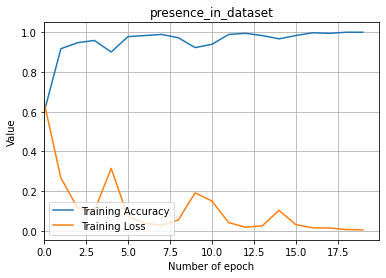

In [3220]:
# ploting accuracy and loss graph
plt.plot(history_presence_in.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_presence_in.history['loss'], label = 'Training Loss')
plt.grid(True)
plt.legend(loc= "lower left")
plt.title('presence_in_dataset')
plt.ylabel('Value')
plt.xlabel('Number of epoch')
plt.xlim(xmin=0)
#plt.figure(figsize=(8,5))
plt.show()

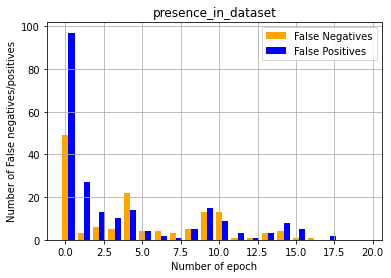

In [3221]:
# plotting False negatives and false postivies bar graphs 
ind = np.arange(history_presence_in.params['epochs'])
width = 0.40
rect1 = plt.bar(ind, history_presence_in.history['false_negatives'], width=width, color = 'orange')
rect2 = plt.bar((ind+width), history_presence_in.history['false_positives'], width=width, color = 'blue')
plt.grid(True)
plt.legend((rect1[0], rect2[0]),('False Negatives', 'False Positives'), loc= "upper right")
plt.title('presence_in_dataset')
plt.ylabel('Number of False negatives/positives')
plt.xlabel('Number of epoch')
plt.show()

In [3222]:
# evaluating model on test set
model_binary_GD.evaluate(presence_in_dataset_test, presence_in_label_test) 
# model evaluated the unseen before test set (121 samples) at 0.0029 loss value 
# and 100% accuracy with 2 hidden layers with 20,10 neurons resp. and learning rate of 0.1 and momentum of 0.9

4/4 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000 - false_positives: 0.0000e+00 - false_negatives: 0.0000e+00


[0.0029202024452388287, 1.0, 0.0, 0.0]

True Values:  [0 0 0 1 0]
Predicted Values:  [[0 0 0 1 0]]

Predicted Class:  Absence 0


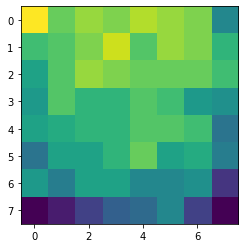


Predicted Class:  Absence 0


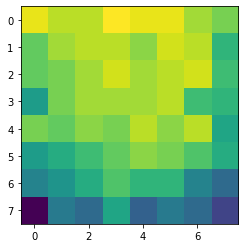


Predicted Class:  Absence 0


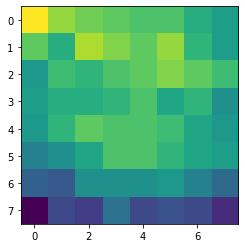


Predicted Class:  Presence 1


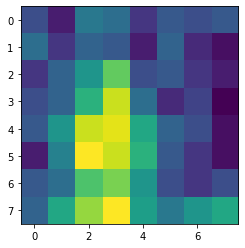


Predicted Class:  Absence 0


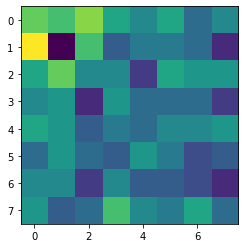

In [3223]:
# predicting answer of presnce/absence using random samples from presence_in_dataset and comparing them with true values of those samples.
rni = random.randint(0, (presence_in_dataset_test.shape[0]-5)) # create random value between 0 and range-5
test_val = presence_in_dataset_test[rni:rni+5]  # pick 5 random samples
test_index = presence_in_label_test[rni:rni+5]  # pick labels of those same samples
print("True Values: ", test_index)
# np.argmax(model.predict(x), axis=-1) for multi-class classification; (model.predict(x) > 0.5).astype("int32") if model does binary classification
test = (model_binary_GD.predict(test_val) > 0.5).astype("int32")
print("Predicted Values: ", test.reshape(1,5))
print()
for x in range(test.shape[0]):
  print("Predicted Class: ", class_categories_names["Presence"][test[x,0]], test[x,0])
  plt.imshow(test_val[x].reshape(8,8))
  plt.show()  
  print()

In [3224]:
# test for distance outdoors using RMSprop to predict classes Dist 1': 0; Dist 3': 1; Dist 6': 2
# datasets which uses binary cross entropy loss and output activation function as sigmoid are presence_in_dataset, presence_out_dataset, location_dataset
# datasets which uses sparse categorical cross entropy loss and output activation function as softmax are dist_in_1_dataset, dist_unknown_dataset, dist_out_dataset, qty_in_dataset, qty_unknown_dataset

two_layer = [20,10] # number of neurons in each hidden layer list
# no need to mention loss and output activation as they are default but still I did
model_3_class = build_model_RMS(n_hidden=2, n_neurons_list=two_layer, activation_function="relu", user_learning_rate=0.009, user_momentum=0.9, n_outputs=3, user_rho = 0.9, user_loss= "sparse_categorical_crossentropy", output_activation="softmax")

In [3225]:
model_3_class.summary() # printing summary of each layer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                1300      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 1,543
Trainable params: 1,543
Non-trainable params: 0
_________________________________________________________________


In [3226]:
print(model_3_class.input_shape)
print(model_3_class.output_shape)
print(model_3_class.loss)

(None, 64)
(None, 3)
sparse_categorical_crossentropy


In [3227]:
weights, biases = model_3_class.layers[1].get_weights()
print(weights)        # random weights
print(weights.shape)  # (20,10) 20 inputs at hidden layer 2 and 10 outputs
print(biases)
print(biases.shape)   # (10) 10 biases for each neuron at hidden layer 2

[[-0.28508514  0.35479677  0.0288645   0.38033742  0.34836853 -0.20698966
  -0.39885107  0.43797088 -0.41307768 -0.21566106]
 [-0.32512206 -0.37611616 -0.3037117   0.14065862 -0.06046265  0.43426454
   0.41081756  0.11233449 -0.39248934 -0.27749896]
 [-0.09463108 -0.18584716 -0.40961817 -0.43650034  0.33525229 -0.01753753
  -0.1578865  -0.03524405  0.04167551 -0.41936606]
 [ 0.21729797 -0.19484359 -0.23729038  0.3937897   0.20116049 -0.04525283
  -0.25910246 -0.13453725 -0.2994907   0.2768718 ]
 [ 0.31816     0.24034965  0.27537566 -0.06741956  0.23219621 -0.0604057
   0.36519378 -0.38949662  0.41021216 -0.35246152]
 [-0.0781956   0.07350606  0.05173793 -0.40129298 -0.06236291 -0.11824435
   0.05823582  0.27404708 -0.11011043 -0.26969472]
 [ 0.06191772  0.4290458   0.24309051  0.01666054  0.26468617  0.29270953
  -0.24489503  0.02413103 -0.238031   -0.22568   ]
 [-0.2272638   0.23440641 -0.00845709  0.00774506 -0.31270075 -0.19542947
  -0.20856865 -0.37176642 -0.36726648 -0.25874048]
 

In [3228]:
# training step
# model is trained to answer what is the distance of the single subject inside.   classes Dist 1': 0; Dist 3': 1; Dist 6': 2.

history_dist_in_1= model_3_class.fit(dist_in_1_dataset_train, dist_in_1_label_train, epochs = 20)

Epoch 1/20
5/5 [==============================] - 0s 3ms/step - loss: 1.0894 - accuracy: 0.4807
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: 2.6566 - accuracy: 0.2527
Epoch 3/20
5/5 [==============================] - 0s 2ms/step - loss: 1.5425 - accuracy: 0.3896
Epoch 4/20
5/5 [==============================] - 0s 2ms/step - loss: 0.9069 - accuracy: 0.6935
Epoch 5/20
5/5 [==============================] - 0s 3ms/step - loss: 0.7385 - accuracy: 0.5655
Epoch 6/20
5/5 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.8416
Epoch 7/20
5/5 [==============================] - 0s 3ms/step - loss: 0.3673 - accuracy: 0.9140
Epoch 8/20
5/5 [==============================] - 0s 3ms/step - loss: 0.2231 - accuracy: 0.9328
Epoch 9/20
5/5 [==============================] - 0s 3ms/step - loss: 0.1573 - accuracy: 0.9567
Epoch 10/20
5/5 [==============================] - 0s 2ms/step - loss: 0.2164 - accuracy: 0.9098
Epoch 11/20
5/5 [======================

In [3229]:
history_dist_in_1.history

{'accuracy': [0.48905110359191895,
  0.29197078943252563,
  0.41605839133262634,
  0.7445255517959595,
  0.6131386756896973,
  0.8686131238937378,
  0.9270073175430298,
  0.9416058659553528,
  0.9416058659553528,
  0.9051094651222229,
  0.985401451587677,
  0.9781022071838379,
  0.9635036587715149,
  0.9197080135345459,
  0.9635036587715149,
  1.0,
  1.0,
  0.9927007555961609,
  0.956204354763031,
  0.9927007555961609],
 'loss': [1.0832890272140503,
  2.7892744541168213,
  1.8662768602371216,
  0.7747695446014404,
  0.6825802326202393,
  0.44307681918144226,
  0.32666152715682983,
  0.22337616980075836,
  0.1833740621805191,
  0.22913511097431183,
  0.08430524915456772,
  0.10203220695257187,
  0.10509487241506577,
  0.1740490198135376,
  0.1413290798664093,
  0.03410256281495094,
  0.04087095335125923,
  0.029043277725577354,
  0.11334461718797684,
  0.03715350851416588]}

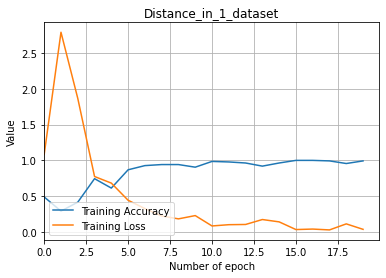

In [3230]:
# plotting training accuracy and training loss of model_3_class using RMSprop
plt.plot(history_dist_in_1.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_dist_in_1.history['loss'], label = 'Training Loss')
plt.grid(True)
plt.legend(loc= "lower left")
plt.title('Distance_in_1_dataset')
plt.ylabel('Value')
plt.xlabel('Number of epoch')
plt.xlim(xmin=0)
#plt.figure(figsize=(8,5))
plt.show()

In [3231]:
# evaluating loss and accuracy on test set. Loss: 0.0773 and accuracy: 95%
model_3_class.evaluate(dist_in_1_dataset_test, dist_in_1_label_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.9565


[0.0772768035531044, 0.95652174949646]

True Values:  [2 1 0 0 0]
Predicted Values:  [2 1 0 0 1]
(5,)

Predicted Class:  Dist 6/8' 2


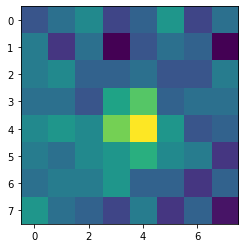


Predicted Class:  Dist 3' 1


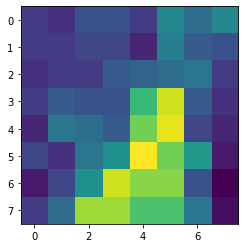


Predicted Class:  Dist 1' 0


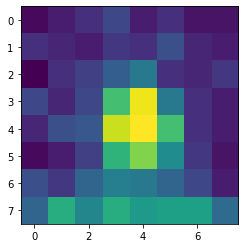


Predicted Class:  Dist 1' 0


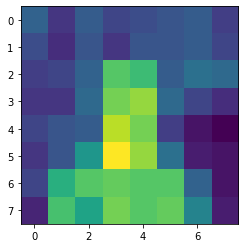


Predicted Class:  Dist 3' 1


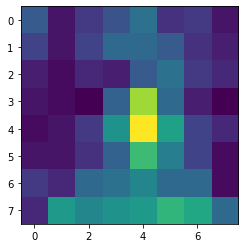

In [3232]:
# predicting class of distance using random samples from dist_in_1_dataset and comparing them with true values of those samples.
rni = random.randint(0, (dist_in_1_dataset_test.shape[0]-5)) # create random value between 0 and range-5
test_val = dist_in_1_dataset_test[rni:rni+5]  # pick 5 random samples
test_index = dist_in_1_label_test[rni:rni+5]  # pick labels of those same samples
print("True Values: ", test_index)
# np.argmax(model.predict(x), axis=-1) for multi-class classification; (model.predict(x) > 0.5).astype("int32") if model does binary classification
test = np.argmax(model_3_class.predict(test_val), axis=-1)
print("Predicted Values: ", test)
print(test.shape)
print()

for x in range(test.shape[0]):
  print("Predicted Class: ", class_categories_names["Distance"][test[x]], test[x])
  plt.imshow(test_val[x].reshape(8,8))
  plt.show()
  print() 